# `Ejercicio de Introducción a PostreSQL y Docker`

In [1]:
import psycopg2
import pandas as pd 
import kaleido
from sqlalchemy import create_engine

In [2]:
connection =  psycopg2.connect(database="myname_db", user="myname_user", password="password", host="127.0.0.1", port="5432")
cursor = connection.cursor()

### Ejericios de creación de tablas, importación de datos y consultas SQL.

#### 1. Crear la tabla nombrada: `employees` y explicar que tarea realiza la consulta realizada y mostrar en pantalla la tabla.

In [3]:
cursor.execute('''DROP TABLE IF EXISTS employees''')
cursor.execute('''CREATE TABLE employees 
   ( employee_id INTEGER
   , first_name VARCHAR(20)
   , last_name VARCHAR(25)
   , email VARCHAR(25)
   , phone_number VARCHAR(20)
   , hire_date DATE
   , job_id VARCHAR(10)
   , salary NUMERIC(8,2)
   , commission_pct NUMERIC(2,2)
   , manager_id INTEGER
   , department_id INTEGER
   ) ;''') #crear tabla con encabezados. 
cursor.execute('CREATE UNIQUE INDEX emp_emp_id_pk ON employees (employee_id) ;') #indice
cursor.execute('ALTER TABLE employees ADD PRIMARY KEY (employee_id);') #la columna employee id dentro de la tabla employee es la llave primaria, o es unica. 
connection.commit()

El siguiente fragmento de código selecciona todas las columnas de la tabla `employees` y muestra 10 registros. Se procede con la ejecución de  la consulta `SELECT count(1) FROM employees;`, sin embargo devuelve `None` porque aun no existen registros en dicha tabla.

In [4]:
cursor.execute('SELECT * FROM employees LIMIT 10;')
record = cursor.fetchone()
print(record)

None


![employess_table](img/employees1.png)

El siguiente fragmento de código cuenta el total de registros de la tabla `employees`. Se procede con la ejecuión de la consulta `SELECT count(1) FROM employees;`, sin embargo devuelve `0` porque aun no existen registros dicha tabla.  

In [5]:
cursor.execute('SELECT count(1) FROM employees;')
record = cursor.fetchone()
print(record)

(0,)


![employess_table](img/employeescount.png)

#### 2. Crear la tabla `courses` con las siguientes columnas:

 

   `course_id` - integer y primary key.  
   `course_name` - valores alfanuméricos o de cadena de hasta 60 caracteres.  
   `course_author` - nombre del autor de hasta 40 caracteres.  
   `course_status` - published, draft, inactive.  
   `course_published_dt` - valor de tipo fecha.  


In [6]:
cursor.execute('''DROP TABLE IF EXISTS courses''')
cursor.execute('''CREATE TABLE courses 
   ( course_id SERIAL PRIMARY KEY NOT NULL
   , course_name VARCHAR(60)
   , course_author VARCHAR(40)
   , course_status VARCHAR(20) CHECK (course_status IN ('published','draft','inactive'))
   , course_published_dt DATE
   ) ;''') #crear tabla con encabezados. 
connection.commit()

#### 3. Insertar Datos 

Inserte los datos en `courses` utilizando los datos proporcionados. Asegúrese de que el `id` es generado por el sistema. No olvide regresar la información de la base de datos.

In [7]:
cursor.execute(''' INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Programming using Python', 'Bob Dillon', 'published', '2020-09-30');
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Data Engineering using Python', 'Bob Dillon', 'published', '2020-07-15');
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Data Engineering using Scala', 'Elvis Presley', 'draft', NULL);
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Programming using Scala', 'Elvis Presley', 'published', '2020-05-12');
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Programming using Java', 'Mike Jack', 'draft', NULL);
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Pipeline Orchestration-Python', 'Bob Dillon', 'draft', NULL);
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Steaming pipelines-Python', 'Bob Dillon', 'published', '2020-10-05');
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Web Applications-Scala Play', 'Elvis Presley', 'inactive', '2020-09-30');
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Web Applications_Python Django', 'Bob Dillon', 'published', '2020-06-23');
INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Server Automation-Ansible', 'Uncle Sam', 'published', '2020-07-05');''')
connection.commit()

![employess_table](img/courses.png)

#### 4. Borre todos los cursos que `no estén en modo borrador ni publicados`.

Proporcione la sentencia de borrado como respuesta para este ejercicio en el `Jupyter Book`. Para validar, obtenga el recuento de todos los cursos publicados por autor y asegúrese de que la salida está ordenada en forma descendente por recuento.

El siguiente fragmento de código borra los de registros de la tabla `courses` de todos los cursos que  no estén en modo borrador ni publicados. 

In [8]:
cursor.execute('''DELETE FROM courses WHERE course_status != 'draft' AND course_status != 'published';''')  
connection.commit()

Luego de eliminar los registros de los cursos que no están en modo borrador ni publicado, se realiza la consulta a través del çódigo `SELECT * FROM courses;` y se imprime la consulta.

In [9]:
cursor.execute('SELECT * FROM courses;')

colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df1 = pd.DataFrame(resultados,columns=colnames)
temp_df1.head()

,course_id,course_name,course_author,course_status,course_published_dt
0,1,Programming using Python,Bob Dillon,published,2020-09-30
1,2,Data Engineering using Python,Bob Dillon,published,2020-07-15
2,3,Data Engineering using Scala,Elvis Presley,draft,None
3,4,Programming using Scala,Elvis Presley,published,2020-05-12
4,5,Programming using Java,Mike Jack,draft,None


A continuación se obtiene el `recuento` de todos los `cursos publicados` por `autor` y el resultado se ordena en forma `descendente por recuento`.

In [10]:
cursor.execute('''SELECT course_author, COUNT(*) AS count FROM courses WHERE course_status = 'published' GROUP BY course_author ORDER BY count DESC;''')

colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df2 = pd.DataFrame(resultados,columns=colnames)
temp_df2.head()

,course_author,count
0,Bob Dillon,4
1,Elvis Presley,1
2,Uncle Sam,1


#### 5. Crear tabla `users`.

In [11]:
cursor.execute('''DROP TABLE IF EXISTS users''')
cursor.execute('''CREATE TABLE users(
    user_id SERIAL PRIMARY KEY,
    user_first_name VARCHAR(30),
    user_last_name VARCHAR(30),
    user_email_id VARCHAR(50),
    user_gender VARCHAR(1),
    user_unique_id VARCHAR(15),
    user_phone_no VARCHAR(20),
    user_dob DATE,
    created_ts TIMESTAMP);''')
connection.commit()

5.1. Inserte los siguientes valores

In [12]:
cursor.execute('''INSERT into users (
    user_first_name, user_last_name, user_email_id, user_gender, 
    user_unique_id, user_phone_no, user_dob, created_ts
) VALUES
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', null, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', null, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', null, '830-40-5287',
     null, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', null, '778-0845', 
     null, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28');''')
connection.commit()

![employess_table](img/users.png)

#### 6. Obtenga el número de usuarios creados por año. Utilice la tabla de usuarios para este ejercicio.


* La salida debe contener el año de 4 dígitos y el recuento.
* Use funciones específicas de fecha para obtener el año usando `created_ts`
* Asegúrese de definir `alias` a las columnas como `created_year` y  `user_count` respectivamente.
* Los datos deben ordenarse de forma ascendente por `created_year`.
* Cuando ejecutes la consulta usando el entorno Jupyter, puede que tenga decimales para los enteros. Por lo tanto, puede mostrar los resultados incluso con decimales.

In [13]:
cursor.execute('''SELECT CAST(EXTRACT(YEAR FROM created_ts) AS INTEGER) AS created_year,
        COUNT(*) AS user_count
FROM 
    users
GROUP BY 
    created_year
ORDER BY 
    created_year;''')


colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df3 = pd.DataFrame(resultados,columns=colnames)
temp_df3.head()

,created_year,user_count
0,2018,13
1,2019,4
2,2020,8


#### 7. Obtenga los días de nacimiento de todos los usuarios nacidos en el mes `May`.


* Utilice la tabla `users` para este ejercicio
* La salida debe contener `user_id`, `user_dob`, `user_email_id` y `user_day_of_birth`.
* Utilice funciones específicas de fecha para obtener el día utilizando `user_dob`. 
* `user_day_of_birth` debe ser un día completo con el primer carácter en mayúsculas, por ejemplo `Tuesday`.
* Los datos deben ordenarse por día dentro del mes `May`


In [14]:
cursor.execute('''SELECT user_id, user_dob, user_email_id,  INITCAP(TO_CHAR(user_dob, 'DAY')) "user_day_of_birth"  
FROM users
	WHERE EXTRACT(MONTH FROM user_dob)=5
	ORDER BY EXTRACT(DAY FROM user_dob) ASC;''') #INITCAP coloca la primera letra del texto en mayúscula y el resto en minúscula


colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df4 = pd.DataFrame(resultados,columns=colnames)
temp_df4.head()


,user_id,user_dob,user_email_id,user_day_of_birth
0,4,1998-05-24,mtanswill3@dedecms.com,Sunday
1,12,1983-05-26,uglayzerb@pinterest.com,Thursday
2,1,1973-05-31,gbode0@imgur.com,Thursday
3,2,2003-05-31,lgisbey1@mail.ru,Saturday


#### 8. Obtenga los `nombres` e `ids de correo electrónico` de los usuarios añadidos en el año `2019`.


* Utilice la tabla `users` para este ejercicio.
* La salida debe contener `user_id`, `user_name`, `user_email_id`, `created_ts`, `created_year`.
* Utilice funciones específicas de fecha para obtener el año utilizando `created_ts`.
* `user_name` es una columna derivada de concatenar `user_first_name` y `user_last_name` con un espacio en medio.
* `user_name` debe tener valores en mayúsculas.
* Los datos deben ordenarse en forma ascendente por `user_name`.



In [15]:
cursor.execute('''SELECT user_id, UPPER(user_first_name || ' ' || user_last_name) "user_name", user_email_id, created_ts, EXTRACT (YEAR FROM created_ts) "created_year" FROM users
	ORDER BY user_name ASC; ''') #UPPER coloca todo el texto en mayúscula 


colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df5 = pd.DataFrame(resultados,columns=colnames)
temp_df5.head()

,user_id,user_name,user_email_id,created_ts,created_year
0,10,BENETTA NANA,bnana9@google.com,2018-10-17 21:02:51,2018
1,18,BLAIR AUMERLE,baumerleh@toplist.cz,2018-10-28 19:25:35,2018
2,14,CALLEY TILSON,ctilsond@issuu.com,2020-06-05 12:10:50,2020
3,22,CARLO YEARBY,cyearbyl@comcast.net,2018-06-24 03:18:40,2018
4,8,CYBIL LISSIMORE,clissimore7@pinterest.com,2019-12-09 14:08:30,2019


#### 9. Obtenga el número de usuarios por género. Utilice la tabla de `users` para este ejercicio.


* La salida debe contener el `gender` y `user_count`.
* Para los hombres la salida debe mostrar `Male` y para las mujeres la salida debe mostrar `Female`.
* Si no se especifica el sexo, se mostrará `Not Specified`.
* Los datos deben ordenarse en forma descendente por `user_count`.


In [16]:
cursor.execute('''SELECT 
    CASE 
        WHEN user_gender = 'M' THEN 'Male'
        WHEN user_gender = 'F' THEN 'Female'
        ELSE 'Not Specified'
    END AS user_gender,
    COUNT(*) AS user_count
FROM 
    users
GROUP BY 
    user_gender
ORDER BY 
    user_count DESC;''') 

colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df6 = pd.DataFrame(resultados,columns=colnames)
temp_df6.head()

,user_gender,user_count
0,Female,13
1,Male,10
2,Not Specified,2


#### 10. Obtenga los 4 últimos dígitos de los ids únicos.


* Utilice la tabla `users` para este ejercicio.
* El resultado debe contener `user_id, user_unique_id` y `user_unique_id_last4`.
* Los identificadores únicos son `null` o `not null`.
* Los identificadores únicos contienen números y guiones y son de diferente longitud.
* Necesitamos obtener los últimos 4 dígitos descartando los guiones sólo cuando el número de dígitos es al menos 9.
* Si el identificador único es nulo, debe mostrarse `Not Specified`.
* Después de descartar los guiones, si el identificador único tiene menos de 9 dígitos, debe mostrar `Invalid Unique Id`.
* Los datos deben ordenarse por `user_id`. Es posible que aparezca `None` o `null` para aquellos identificadores de usuario en los que no haya un identificador único para `user_unique_id`.

In [17]:
cursor.execute('''SELECT user_id, user_unique_id,	 

CASE
  WHEN user_unique_id IS NULL THEN 'Not Specified'
  WHEN LENGTH(REPLACE(user_unique_id, '-', '')) < 9 THEN 'Invalid Unique Id'
ELSE
	RIGHT(REPLACE(user_unique_id, '-', ''),4) 
END AS "user_unique_id_last4"

FROM users;''') 

colnames = [desc[0] for desc in cursor.description]
resultados = cursor.fetchall()
temp_df7 = pd.DataFrame(resultados,columns=colnames)
temp_df7.head()

,user_id,user_unique_id,user_unique_id_last4
0,1,88833-8759,8759
1,2,262501-029,1029
2,3,391-33-2823,2823
3,4,1195413-80,1380
4,5,471-24-6869,6869


#### 11.  Obtenga el recuento de usuarios en función del código de país.


* Utilice la tabla `users` para este ejercicio.
* La salida debe contener el código de país y el recuento.
* No debe haber ningún `+` en el código de país. Sólo debe contener dígitos.
* Los datos deben ordenarse como números por código de país.
* Debemos descartar `user_phone_no` con valores `null`.


In [18]:

cursor.execute('''SELECT CAST(split_part(REPLACE(user_phone_no, '+', ''),' ',1) AS INTEGER) AS "country_code",
	COUNT(*)
		FROM users
	WHERE user_phone_no IS NOT NULL 
GROUP BY "country_code"
ORDER BY "country_code";''') 

colnames = [desc[0] for desc in cursor.description]

resultados1 = cursor.fetchall()
temp_df8 = pd.DataFrame(resultados1,columns=colnames)
temp_df8.head()




,country_code,count
0,1,1
1,7,2
2,48,1
3,54,1
4,55,1


### Cardano USD (ADA-USD).

#### 12. Gráfico de  `candlestick` de datos de `Cardano USD (ADA-USD)`

Importe los datos del precio de `Cardano USD (ADA-USD)` en su instancia de base de datos `Docker`, teniendo en cuenta lo explicado durante esta sección. Luego dibuje un `gráfico de candlestick` para la criptomoneda. En el siguiente link encontrará el `CSV` de `Cardano`: Cardano USD (ADA-USD). Describa lo que puede observar en la serie de tiempo. Realice un análisis exploratorio de datos `(EDA)` para la serie de tiempo.

Con el fragmento de código relacionado a continuación se crea tabla `cardano`

In [19]:
cursor.execute('''DROP TABLE IF EXISTS cardano''')
cursor.execute('''CREATE TABLE cardano(
    cardano_date DATE,
    cardano_open FLOAT8,
    cardano_high FLOAT8, 
    cardano_low FLOAT8,
    cardano_close FLOAT8, 
    cardano_adj_close FLOAT8, 
    cardano_volume INTEGER);''')
connection.commit()


Una vez creada la tabla, procedemos con la lectura de los datos, a través del código:

In [20]:
df_c = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv")
df_c.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Renombramos las columnas de nuestro dataframe conforme a los nombres asignados durante la creación de la tabla en nuestra base de datos. 

In [21]:
df_c = df_c.rename({'Date': 'cardano_date', 
               'Open': 'cardano_open', 
               'High': 'cardano_high', 
               'Low': 'cardano_low', 
               'Close': 'cardano_close', 
               'Adj Close': 'cardano_adj_close', 
               'Volume': 'cardano_volume'}, axis=1)
df_c.head()

,cardano_date,cardano_open,cardano_high,cardano_low,cardano_close,cardano_adj_close,cardano_volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Con el siguiente fragmento de código creo la conexión usando la libreria `sqlalchemy` para cargar en `PostgreSQL` el archivo `CSV` que contiene la información y/o datos de `Cardano USD (ADA-USD)`.

In [22]:
db_params = {
    'host': 'localhost',
    'database': 'myname_db',
    'user': 'myname_user',
    'password': 'password'
}
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}')
df_c.to_sql('cardano', engine, if_exists = 'replace', index=False, method='multi')

1475

A continuación se imprime los datos de la tabla `cardano`  importada en la bade de datos `myname_bd` usando `pgAdmin` con la información de `Cardano USD (ADA-USD)`.

In [23]:

cursor.execute('''SELECT * FROM cardano;''')
colnames = [desc[0] for desc in cursor.description]


resultados = cursor.fetchall()
temp_df = pd.DataFrame(resultados,columns=colnames)
temp_df.head()

,cardano_date,cardano_open,cardano_high,cardano_low,cardano_close,cardano_adj_close,cardano_volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Para realizar `gráfico de candlestick`  procedemos con la instalación de las librerias `plotly` y `kaleido` en nuestro enterno `(sql_venv)` con las siguientes intrucciones: 
* pip install -U plotly
* pip install -U kaleido

Luego ejecutamos el siguiente código: 

In [24]:

import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py

df_g = temp_df.copy()
fig = go.Figure(data=[go.Candlestick(x = df_g['cardano_date'],
                                     open = df_g['cardano_open'], 
                                     high = df_g['cardano_high'],
                                     low = df_g['cardano_low'], 
                                     close = df_g['cardano_close'])
                     ])
fig.update_layout(
    title="Cardano USD (ADA-USD)",
    xaxis_title="Day",
    yaxis_title="ADA-USD",
    font=dict(
        family="Verdana, monospace",
        size=12,
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

El `gráfico de candlestick` revela una dinámica interesante en el mercado de la criptomoneda en estudio. Durante el mes de octubre y principios del mes de noviembre del año 2017, se observa que no hubo fluctuaciones considerables en el volumen de transacciones realizadas con la criptomoneda Cardano; sin embargo, a partir del mes de diciembre de 2017, se presenta un pico ascendente que indica un período de alta actividad y aumento de precios, posiblemente debido a un aumento repentino en la demanda de la criptomoneda. La estabilidad entre 2019 y 2020 refleja un período de consolidación después del pico anterior. El segundo pico ascendente en 2021 sugiere actividad alcista, que podría estar respaldada por la adopción institucional de la criptomoneda.

#### 13. Análisis Exploratorio de Datos

Descripción general del conjunto de datos `Cardano USD (ADA-USD)`.

In [25]:
print("Tipo de datos:")
print(temp_df.dtypes)

total_registros = temp_df.shape[0]

Tipo de datos:
cardano_date          object
cardano_open         float64
cardano_high         float64
cardano_low          float64
cardano_close        float64
cardano_adj_close    float64
cardano_volume       float64
dtype: object


Se observa que nuestro conjunto de datos tiene un total de 7 variables (columnas) con tipo de dato `float64`. Éste tipo de datos contiene caracteres numéricos con decimales. Contamos con un total de registro de `1475` datos.  A continuación se imprime los datos de la tabla `cardano`:

In [26]:
cursor.execute('''SELECT * FROM cardano
               ORDER BY cardano_date;''')
colnames = [desc[0] for desc in cursor.description]


resultados = cursor.fetchall()
temp_df = pd.DataFrame(resultados,columns=colnames)
temp_df.head()

,cardano_date,cardano_open,cardano_high,cardano_low,cardano_close,cardano_adj_close,cardano_volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Definición de variables: 

* `cardano_date:` Fecha. 
* `cardano_open:` Precio de Apertura en la bolsa. 
* `cardano_high:` Mayor precio alcanzado durante el transcurso del día.
* `cardano_low:` Menor precio alcanzado durante el transcurso del día. 
* `cardano_close:` Precio de Cierre en la bolsa. 
* `cardano_adj_close:`  Precio de cierre ajustado en la bolsa, cuya estimación toma en consideración los dividendos y los splits para sus cálculos.
* `cardano_volume:` Volumen total de negociación en cardano.

Resumen de datos

Se presenta a continuación un resumen de las medidas de estadística descriptiva aplicadas al conjunto de datos bajo análisis. Se ha identificado la presencia de un total de 4 registros faltantes (NULL) en cada una de las variables del conjunto de datos en análisis, los cuales pueden influir en el análisis estadístico y requiere  posiblemente tratamiento adicional para garantizar la validez de los resultados obtenidos.

In [27]:
temp_df[["cardano_open", "cardano_high", "cardano_low", "cardano_close", "cardano_adj_close", "cardano_volume"]].describe()

,cardano_open,cardano_high,cardano_low,cardano_close,cardano_adj_close,cardano_volume
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03
mean,0.374234,0.393359,0.354385,0.375726,0.375726,1.090947e+09
std,0.609602,0.639195,0.578952,0.611501,0.611501,2.258370e+09
min,0.018414,0.021050,0.017354,0.018539,0.018539,1.739460e+06
25%,0.047560,0.049503,0.046073,0.047592,0.047592,5.366896e+07
50%,0.093398,0.096776,0.090105,0.093434,0.093434,1.359691e+08
75%,0.301339,0.318211,0.283567,0.301889,0.301889,6.999972e+08
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


A continuación se presenta el fragmento de código correspondiente a la función que generá dos tipos diferentes de gráficos (Histograma y Diagrama de Cajas y Bigotes) para visualizar una variable unidimensional. Para ello, primero procedemos con la instalación de la libreria `seaborn`. Del mismo modo, instalamos la libreria `matplotlib` para mejorar la estética del color. Todo lo anterior se realiza dentro de nuestro entorno `(sql_venv)` con las siguientes instrucciones:

* pip install seaborn
* pip install matplotlib


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
custom_colors = ["#8B4513","#DEB887", "#FFEBCD","#C0C0C0", "#B0E0E6","#4682B4","#008080"]

def double_plot(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(19.5,10),sharex=False)
    sns.histplot(x, ax=ax[0],color=c, kde=True, stat="density")
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE', fontsize=10)
    sns.boxplot(x, ax=ax[1],orient="h",color=c)
    ax[1].set(xlabel=None)
    ax[1].set(ylabel=None)
    ax[1].set_title('Boxplot', fontsize=10)
    fig.suptitle(title, fontsize=12)
    plt.tight_layout(pad=2.0)
    plt.show()


A continuación se observa la distribución de nuestras variables objeto de análisis. 

* `Precio de Apertura`

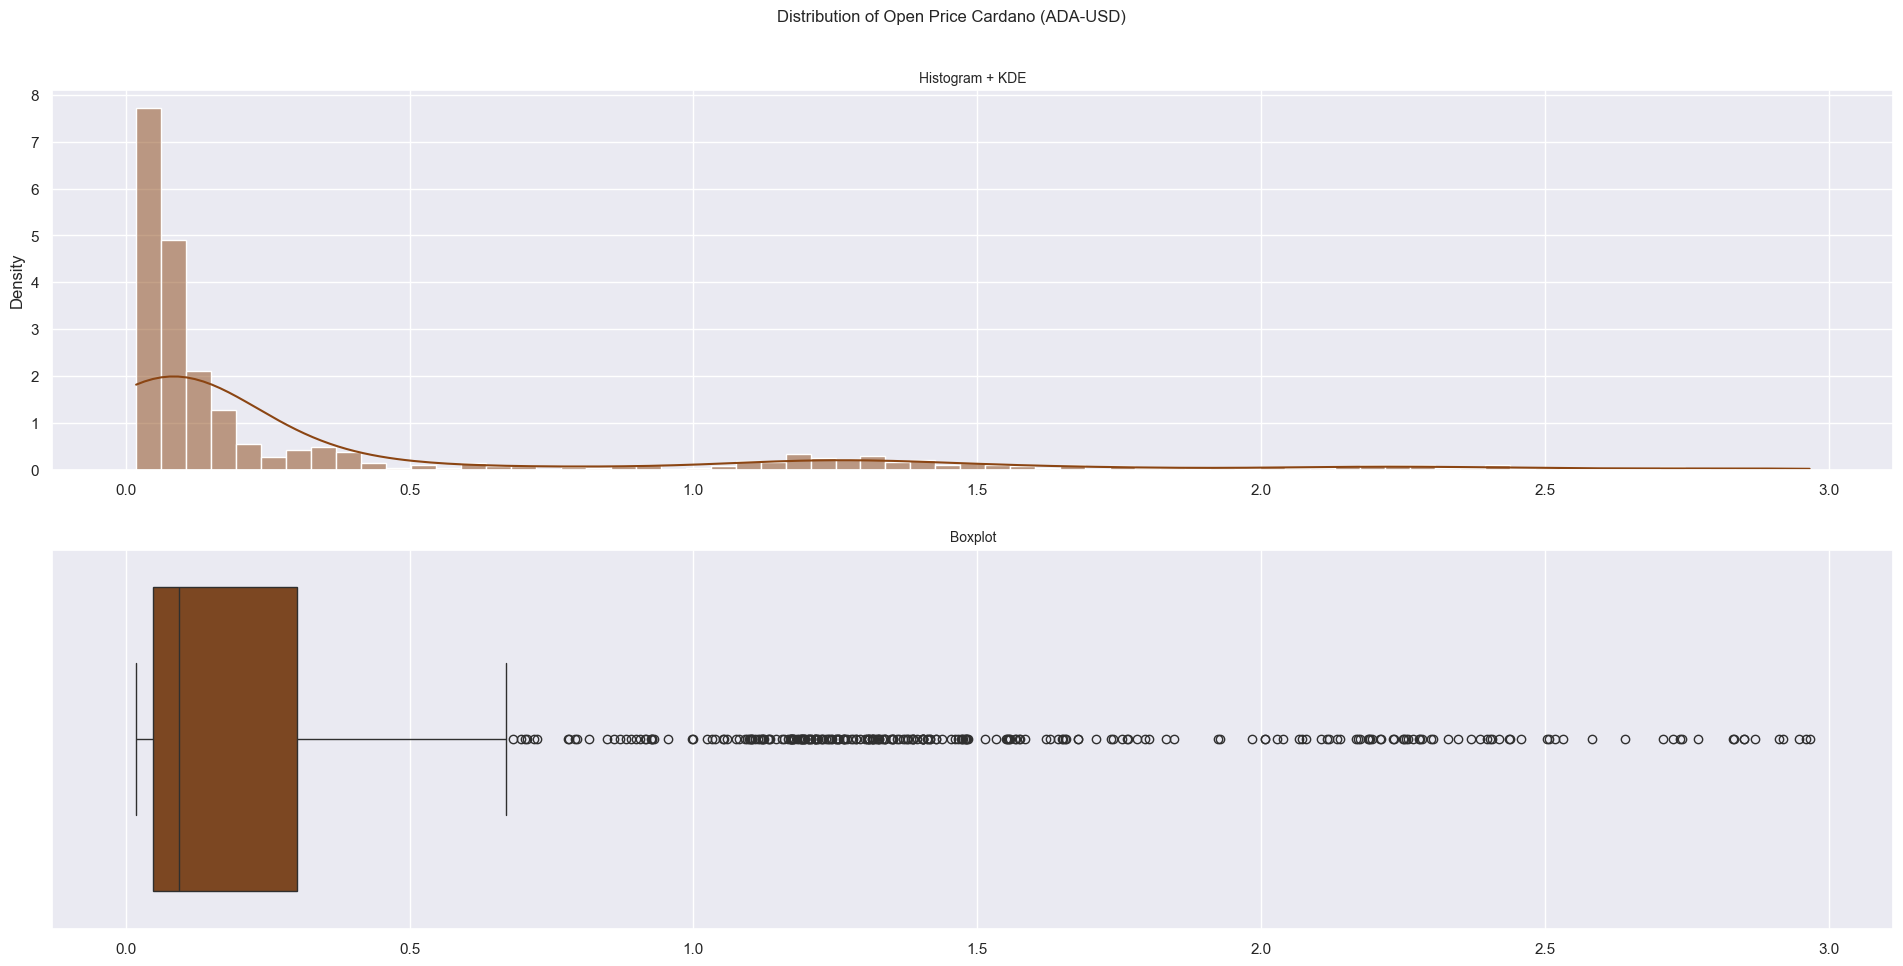

In [29]:
double_plot(temp_df['cardano_open'],'Distribution of Open Price Cardano (ADA-USD)',custom_colors[0])

* `Mayor precio alcanzado durante el transcurso del día.`

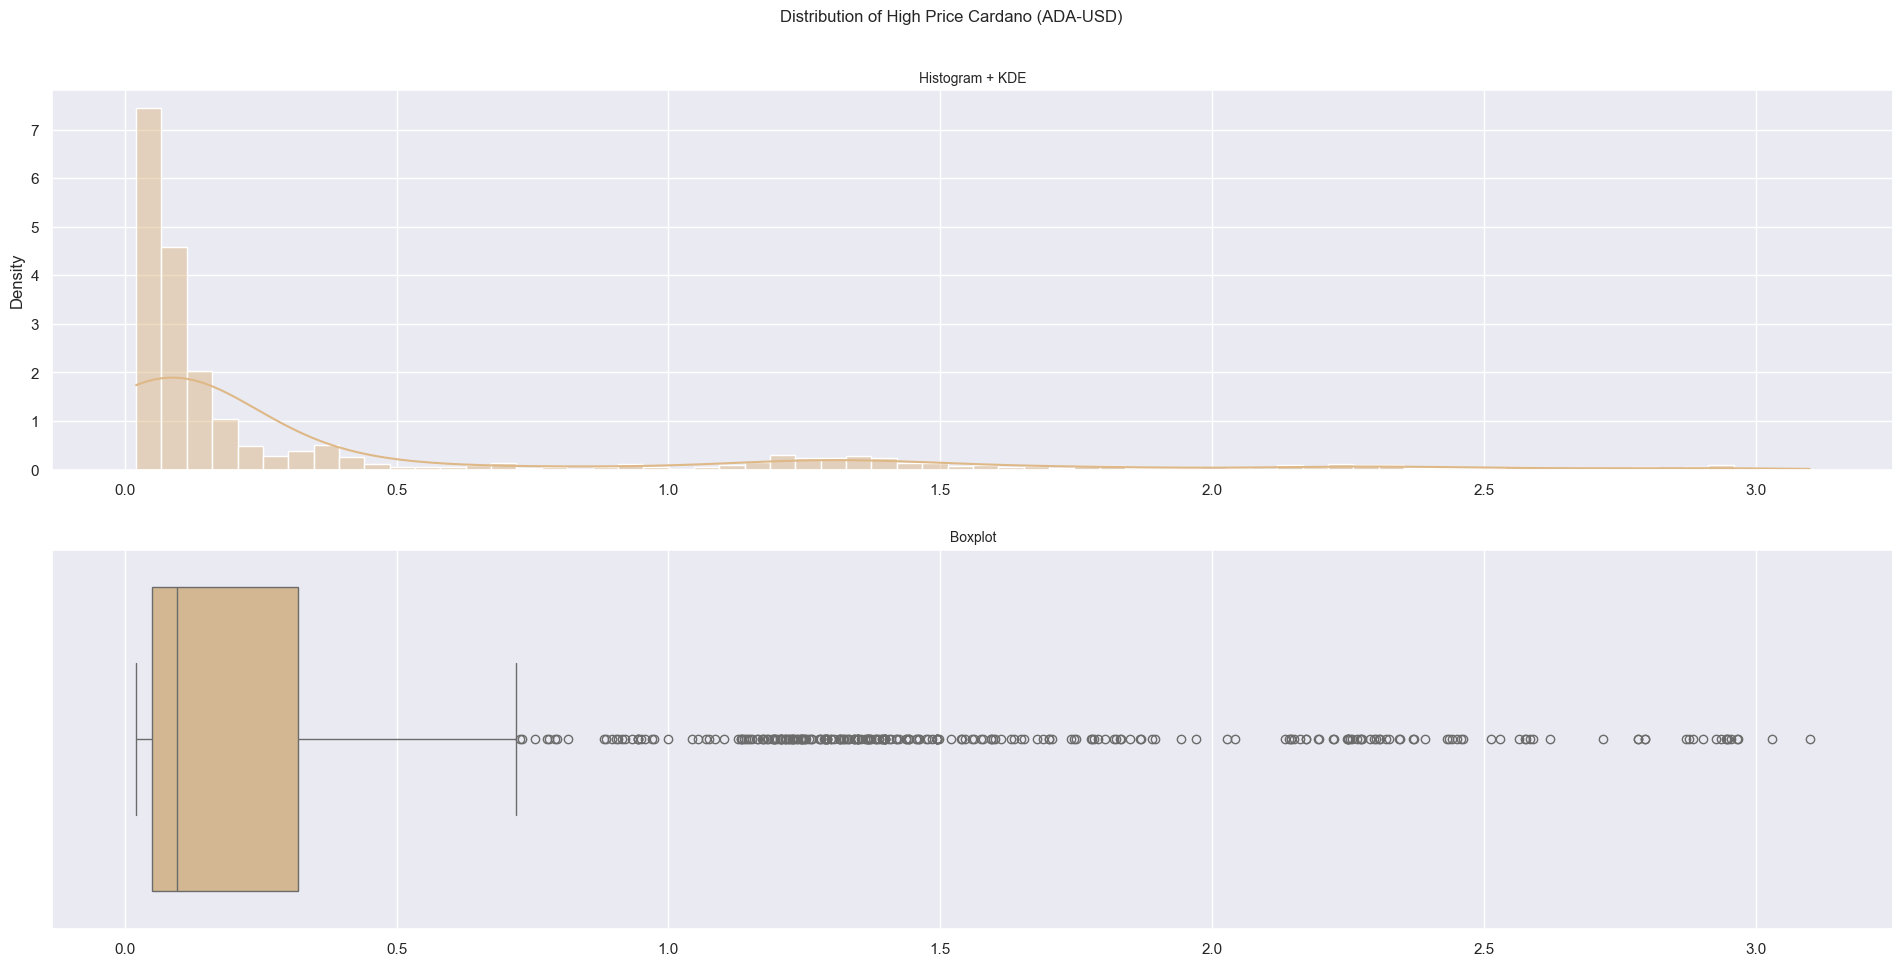

In [30]:
double_plot(temp_df['cardano_high'],'Distribution of High Price Cardano (ADA-USD)',custom_colors[1])

* `Menor precio alcanzado durante el transcurso del día.`

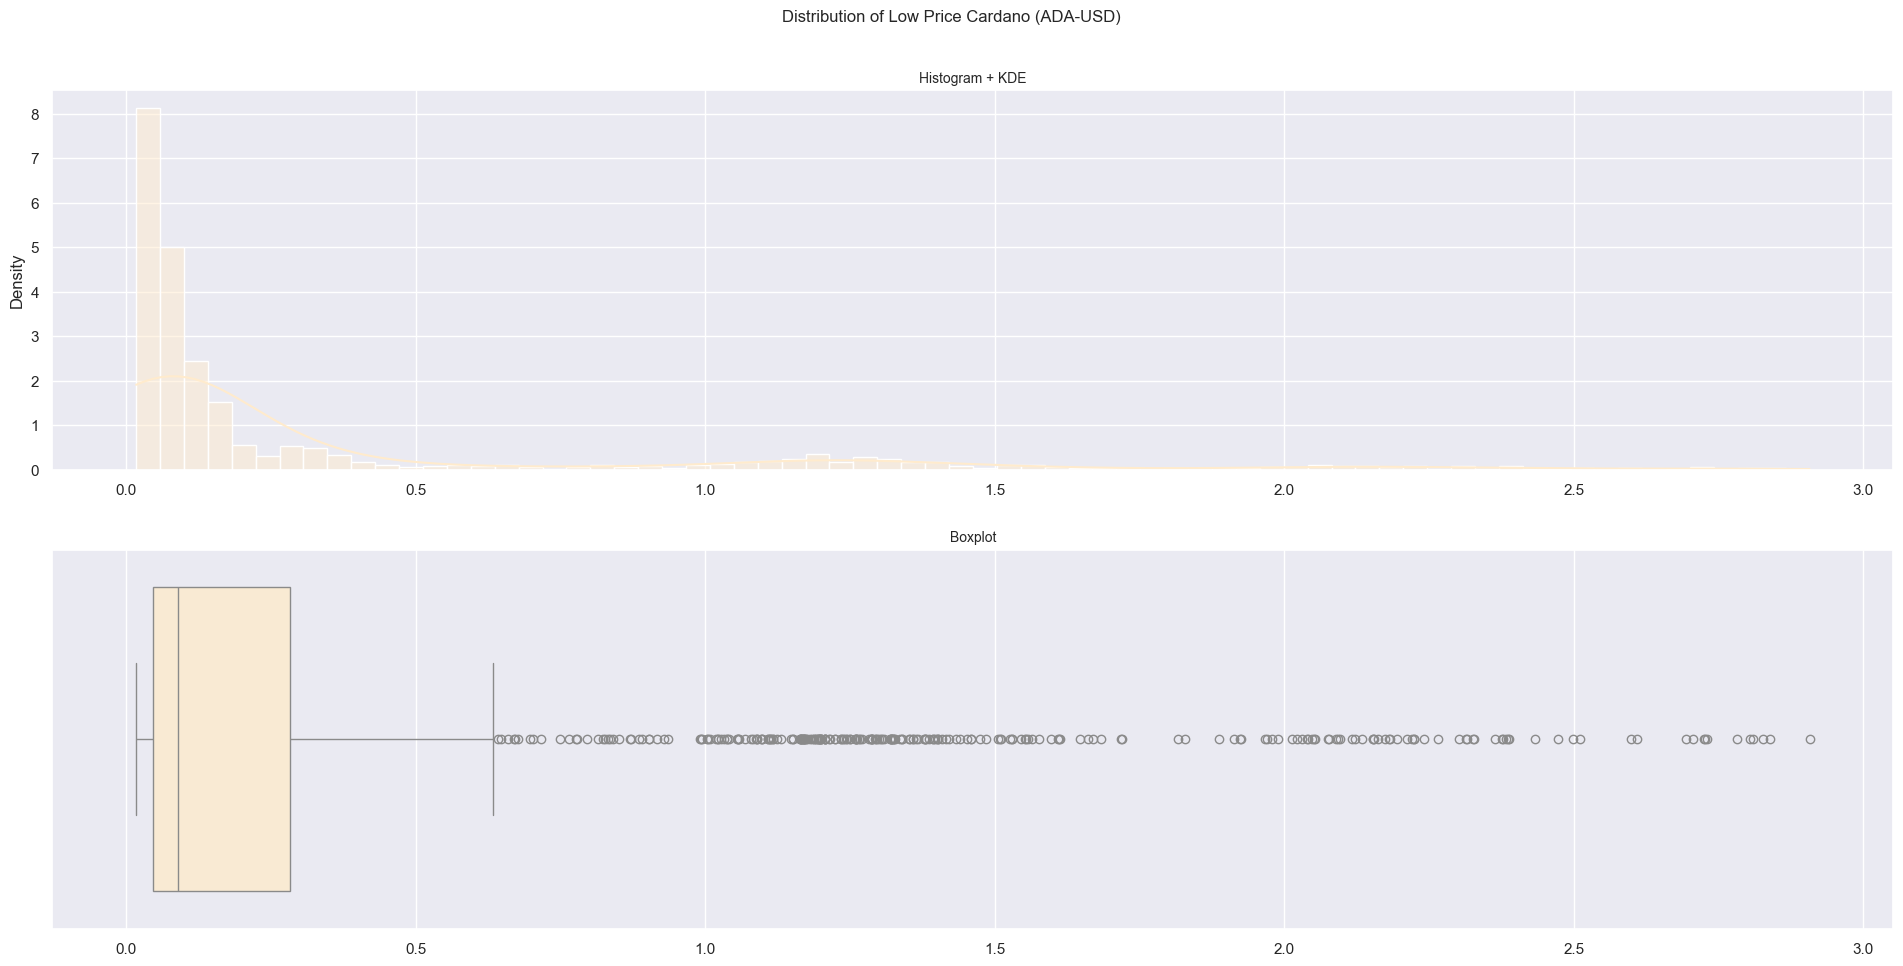

In [31]:
double_plot(temp_df['cardano_low'],'Distribution of Low Price Cardano (ADA-USD)',custom_colors[2])

* `Precio de Cierre`

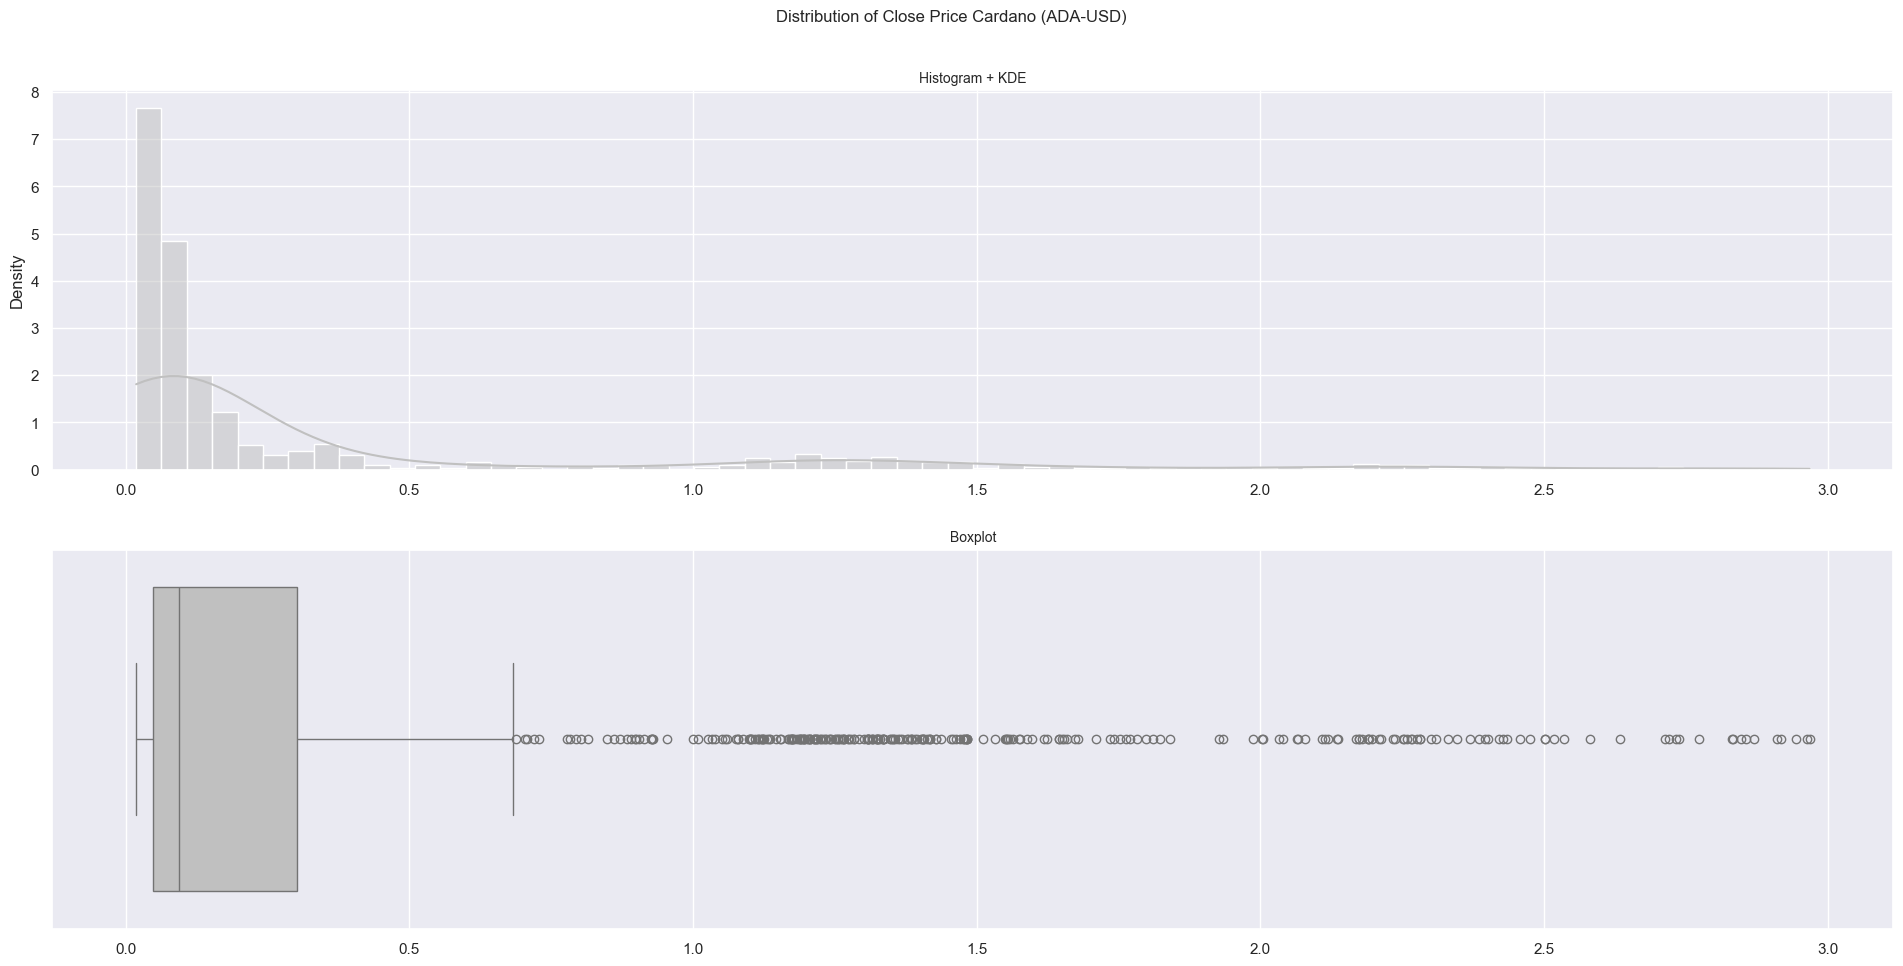

In [32]:
double_plot(temp_df['cardano_close'],'Distribution of Close Price Cardano (ADA-USD)',custom_colors[3])

* `Precio de Cierre Ajustado`

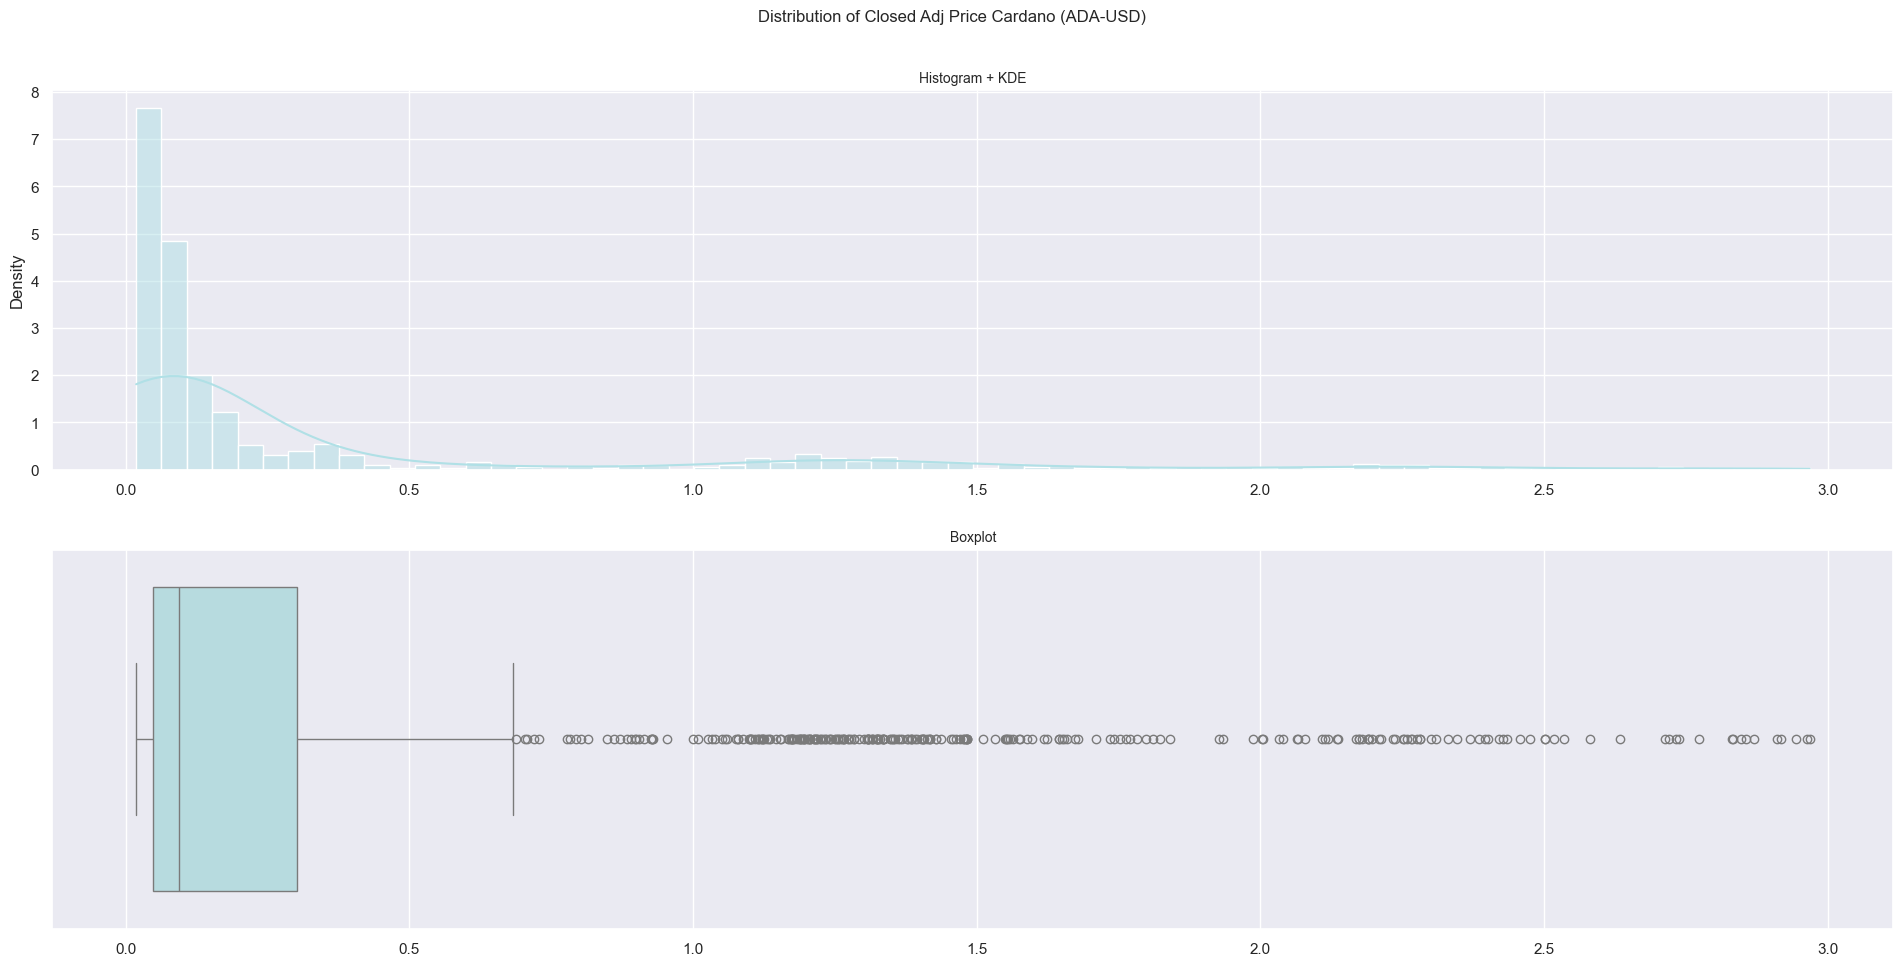

In [33]:
double_plot(temp_df['cardano_adj_close'],'Distribution of Closed Adj Price Cardano (ADA-USD)',custom_colors[4])

* Volumen total de negociación de criptomoneda, en este caso el Cardano (ADA-USD).

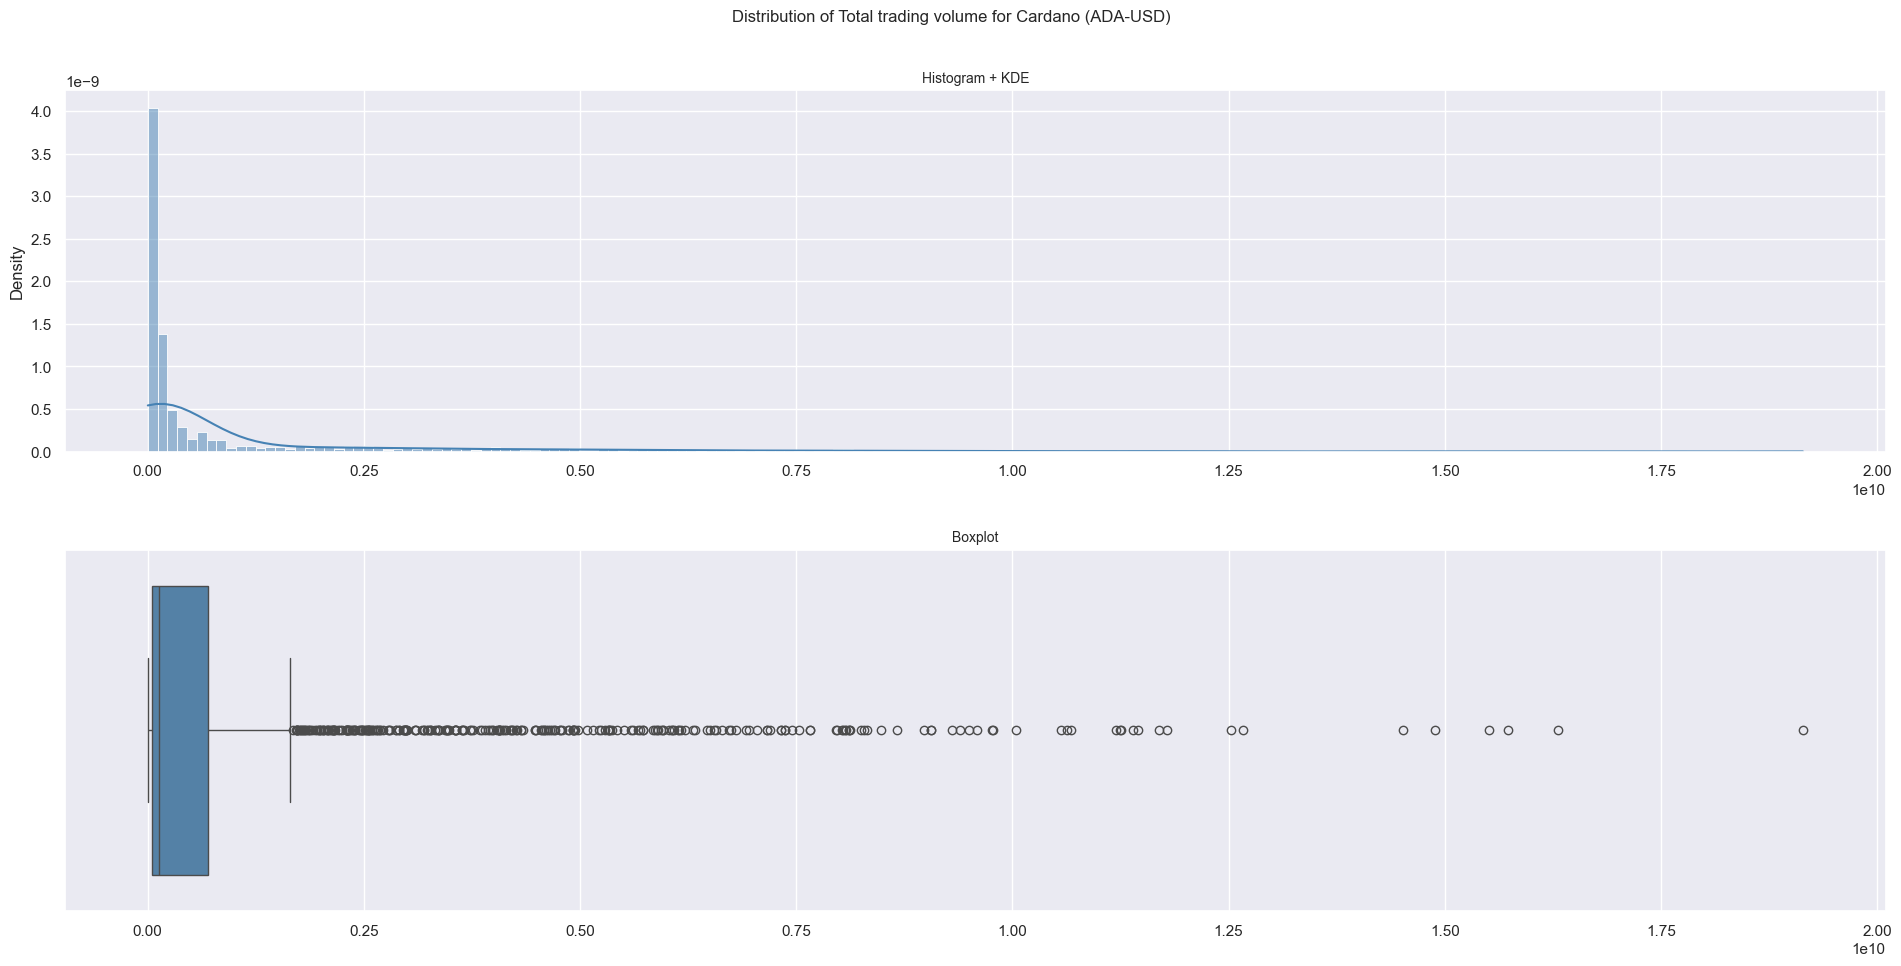

In [34]:
double_plot(temp_df['cardano_volume'],'Distribution of Total trading volume for Cardano (ADA-USD)',custom_colors[5])

Volumen total de negociación de criptomoneda por año (Cardano ADA-USD).

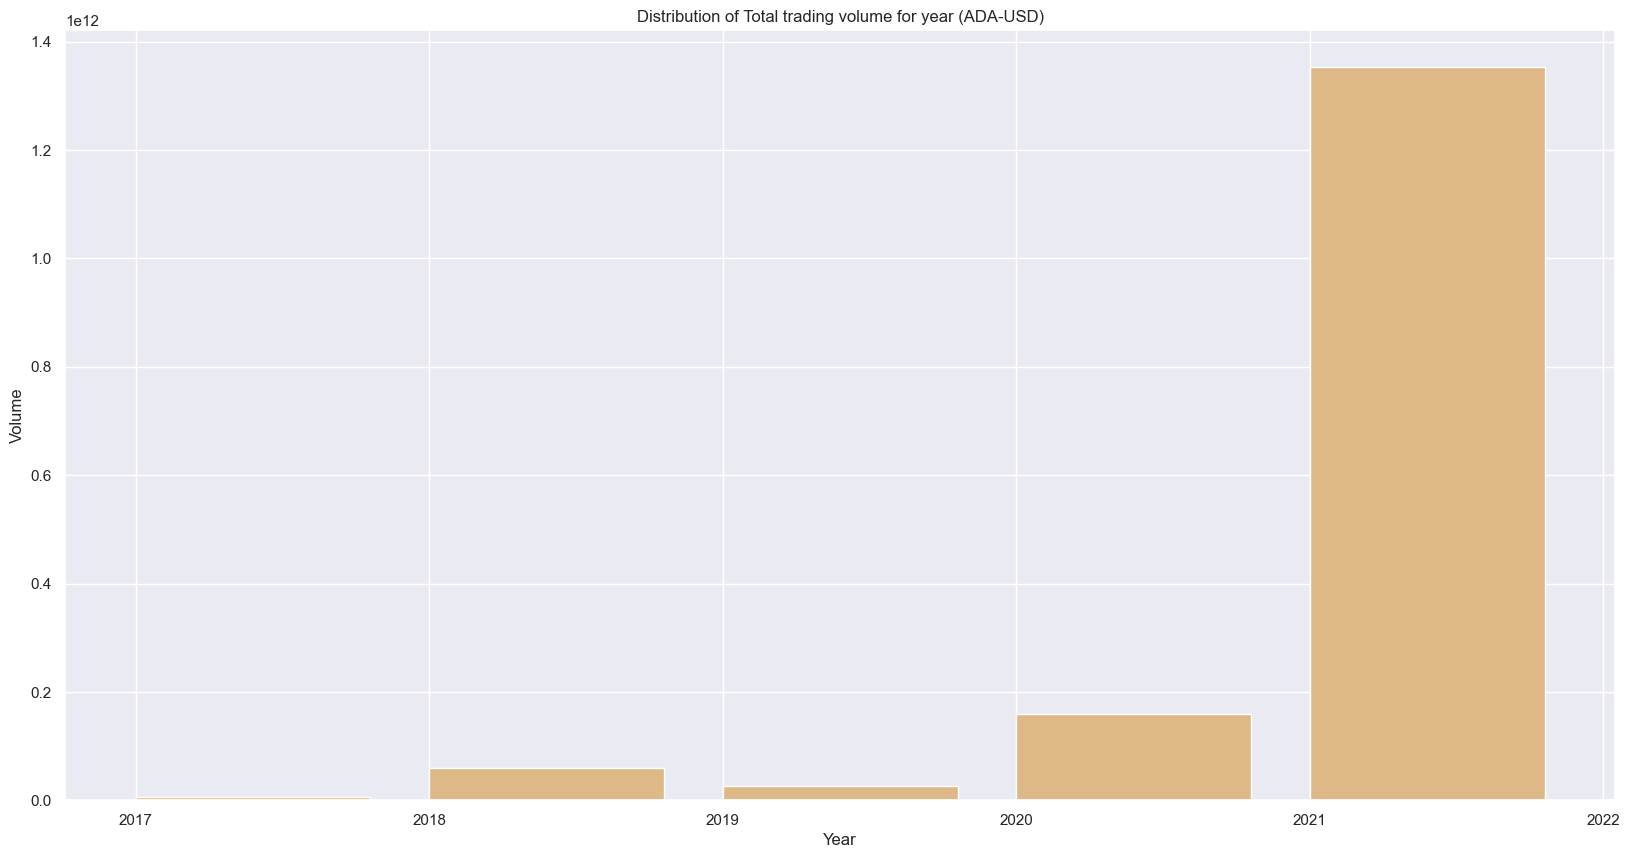

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

filter_temp_df = temp_df.copy()

custom_colors = ["#8B4513","#DEB887", "#FFEBCD","#B0E0E6","#009c8c","#008080"]

filter_temp_df = filter_temp_df.sort_values(by=['cardano_date'], ascending=True) #organiza el dataset por fechas descendente, es necesario para formular de forma correcta. 
filter_temp_df = filter_temp_df[['cardano_date', 'cardano_volume']]
filter_temp_df['cardano_date'] = pd.to_datetime(filter_temp_df['cardano_date'], errors='coerce')
filter_temp_df['cardano_year'] = filter_temp_df['cardano_date'].dt.year
filter_temp_df_bar = filter_temp_df[['cardano_year', 'cardano_volume']]

filter_temp_df_bar = filter_temp_df_bar.groupby('cardano_year')['cardano_volume'].sum()

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = filter_temp_df_bar.index, height = filter_temp_df_bar, align = "edge", color = '#DEB887')
plt.title('Distribution of Total trading volume for year (ADA-USD)')      #El título
ax.set_xlabel('Year')  #Nombre del eje x
ax.set_ylabel('Volume')  #Nombre del eje y
plt.show()


El gráfico de barras revela un notable aumento en las transacciones efectuadas durante el año 2021, reflejado en el volumen total de negociación en Cardano. Es probable que este incremento sea una de las razones por las cuales se presentan tantos datos atípicos, como se visualizan en los boxplots graficados anteriormente.

A continuación se presenta análisis de `correlación` entre variables para evaluar `la relación lineal` entre pares de variables dentro del conjunto de datos a través de gráfico de dispersión.

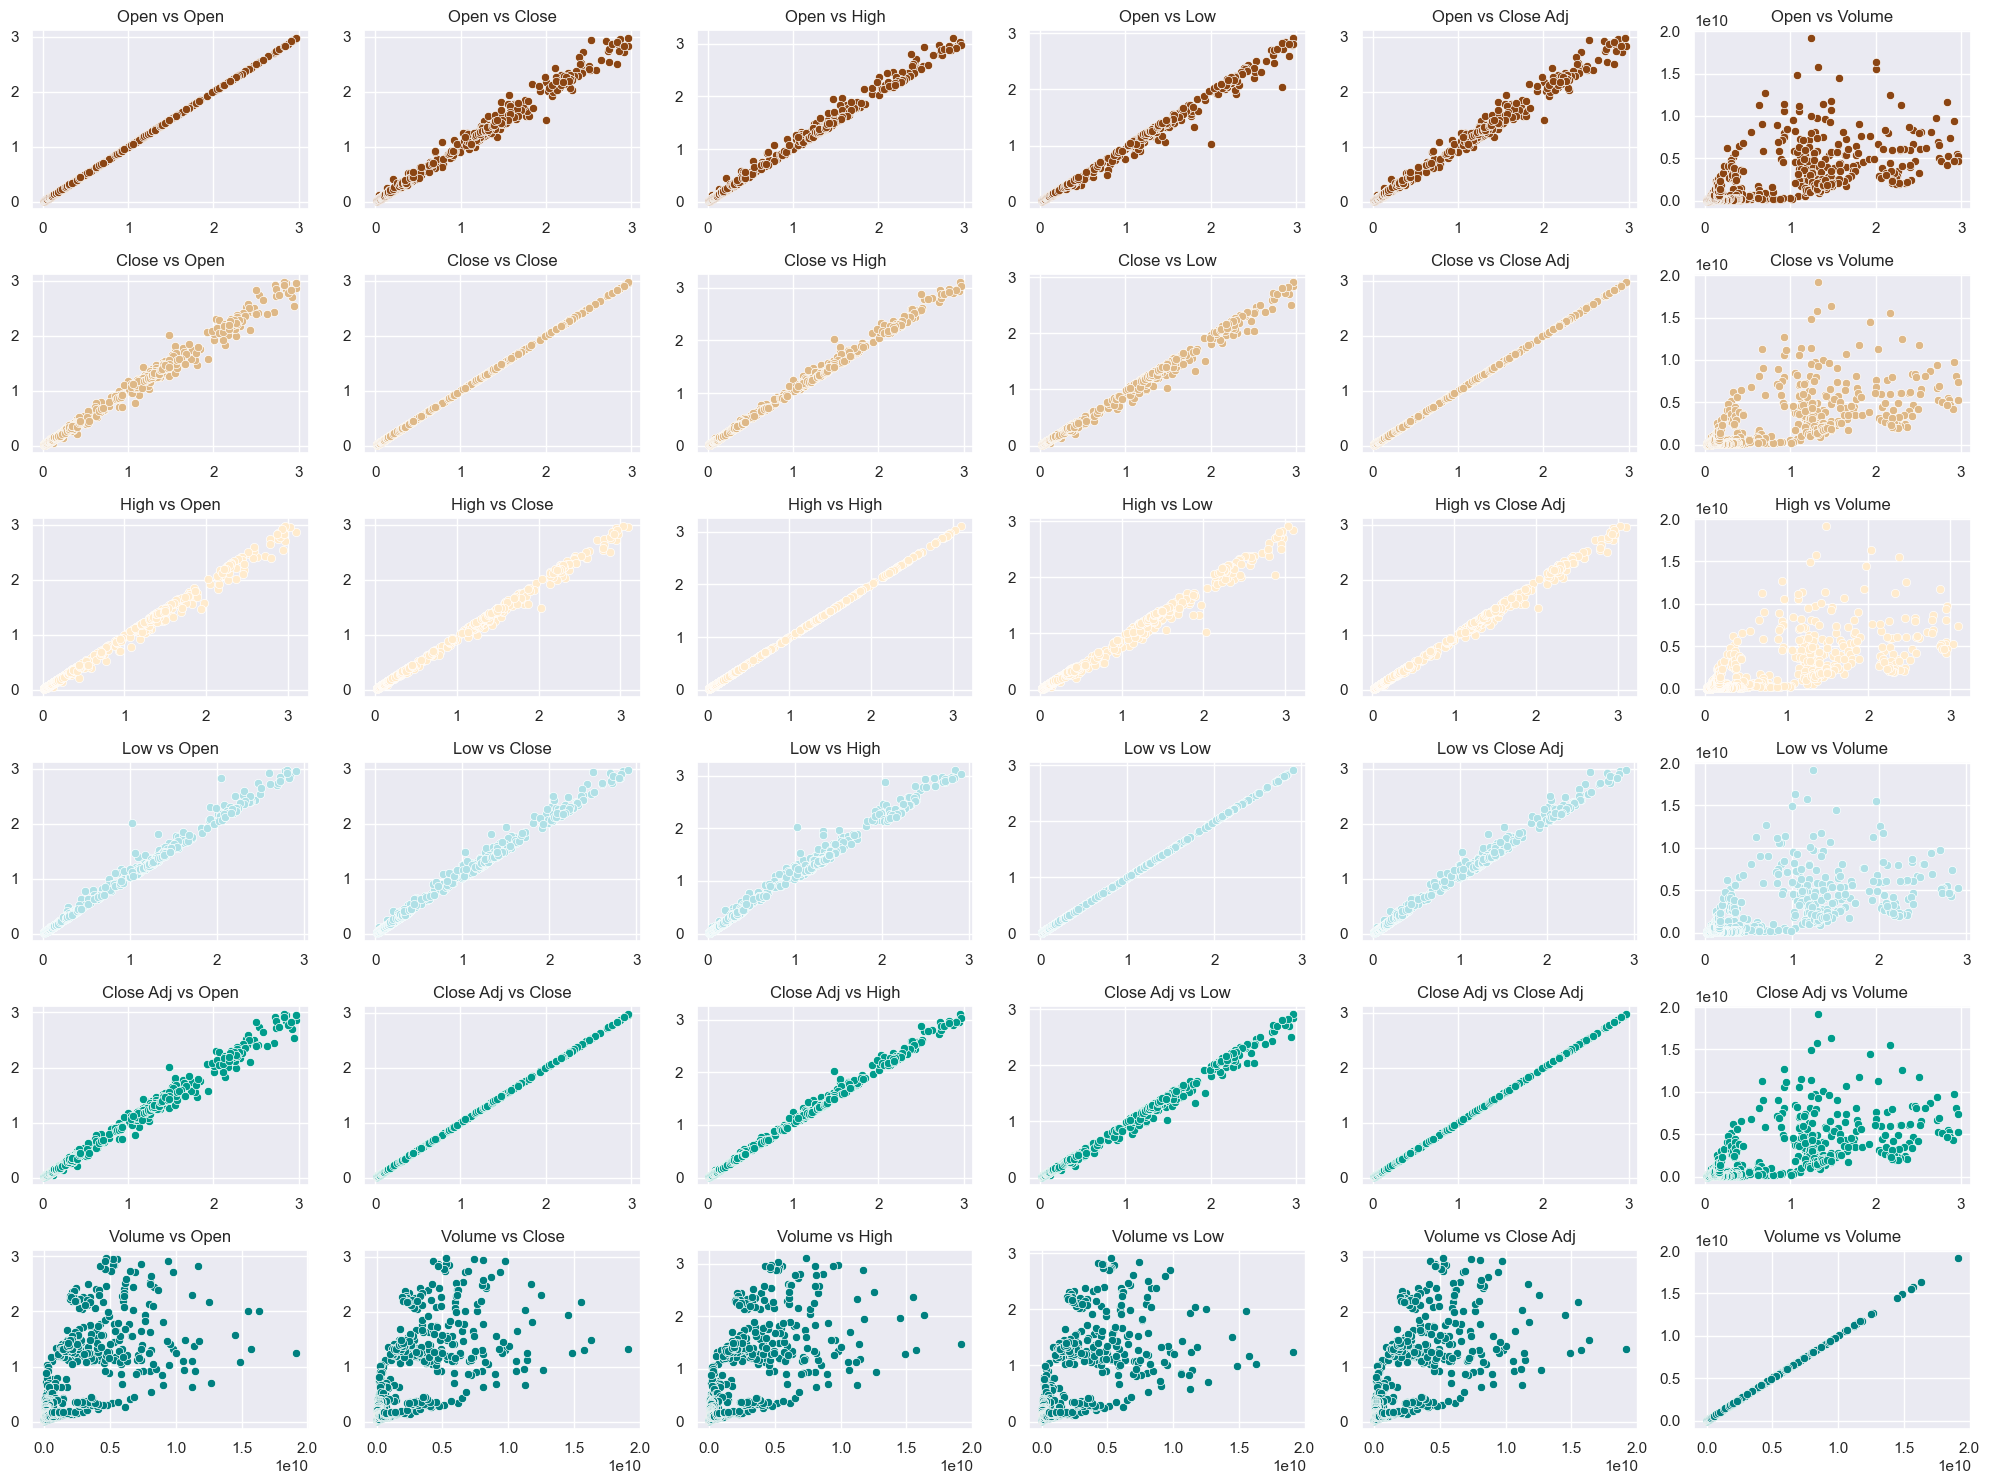

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

s_p_temp_df = temp_df.copy()

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 15))

# Crear los subplots utilizando Seaborn
sns.scatterplot(x=s_p_temp_df['cardano_open'], y=s_p_temp_df['cardano_open'], ax=axes[0,0], color='#8B4513')
axes[0,0].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_open'], y=s_p_temp_df['cardano_close'], ax=axes[0,1], color='#8B4513')
axes[0,1].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_open'], y=s_p_temp_df['cardano_high'], ax=axes[0,2], color='#8B4513')
axes[0,2].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_open'], y=s_p_temp_df['cardano_low'], ax=axes[0,3], color='#8B4513')
axes[0,3].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_open'], y=s_p_temp_df['cardano_adj_close'], ax=axes[0,4], color='#8B4513')
axes[0,4].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_open'], y=s_p_temp_df['cardano_volume'], ax=axes[0,5], color='#8B4513')
axes[0,5].set(xlabel=None, ylabel=None)


sns.scatterplot(x=s_p_temp_df['cardano_close'], y=s_p_temp_df['cardano_open'], ax=axes[1,0], color='#DEB887')
axes[1,0].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_close'], y=s_p_temp_df['cardano_close'], ax=axes[1,1], color='#DEB887')
axes[1,1].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_close'], y=s_p_temp_df['cardano_high'], ax=axes[1,2], color='#DEB887')
axes[1,2].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_close'], y=s_p_temp_df['cardano_low'], ax=axes[1,3], color='#DEB887')
axes[1,3].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_close'], y=s_p_temp_df['cardano_adj_close'], ax=axes[1,4], color='#DEB887')
axes[1,4].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_close'], y=s_p_temp_df['cardano_volume'], ax=axes[1,5], color='#DEB887')
axes[1,5].set(xlabel=None, ylabel=None)

sns.scatterplot(x=s_p_temp_df['cardano_high'], y=s_p_temp_df['cardano_open'], ax=axes[2,0], color='#FFEBCD')
axes[2,0].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_high'], y=s_p_temp_df['cardano_close'], ax=axes[2,1], color='#FFEBCD')
axes[2,1].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_high'], y=s_p_temp_df['cardano_high'], ax=axes[2,2], color='#FFEBCD')
axes[2,2].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_high'], y=s_p_temp_df['cardano_low'], ax=axes[2,3], color='#FFEBCD')
axes[2,3].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_high'], y=s_p_temp_df['cardano_adj_close'], ax=axes[2,4], color='#FFEBCD')
axes[2,4].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_high'], y=s_p_temp_df['cardano_volume'], ax=axes[2,5], color='#FFEBCD')
axes[2,5].set(xlabel=None, ylabel=None)


sns.scatterplot(x=s_p_temp_df['cardano_low'], y=s_p_temp_df['cardano_open'], ax=axes[3,0], color='#B0E0E6')
axes[3,0].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_low'], y=s_p_temp_df['cardano_close'], ax=axes[3,1], color='#B0E0E6')
axes[3,1].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_low'], y=s_p_temp_df['cardano_high'], ax=axes[3,2], color='#B0E0E6')
axes[3,2].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_low'], y=s_p_temp_df['cardano_low'], ax=axes[3,3], color='#B0E0E6')
axes[3,3].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_low'], y=s_p_temp_df['cardano_adj_close'], ax=axes[3,4], color='#B0E0E6')
axes[3,4].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_low'], y=s_p_temp_df['cardano_volume'], ax=axes[3,5], color='#B0E0E6')
axes[3,5].set(xlabel=None, ylabel=None)


sns.scatterplot(x=s_p_temp_df['cardano_adj_close'], y=s_p_temp_df['cardano_open'], ax=axes[4,0], color='#009c8c')
axes[4,0].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_adj_close'], y=s_p_temp_df['cardano_close'], ax=axes[4,1], color='#009c8c')
axes[4,1].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_adj_close'], y=s_p_temp_df['cardano_high'], ax=axes[4,2], color='#009c8c')
axes[4,2].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_adj_close'], y=s_p_temp_df['cardano_low'], ax=axes[4,3], color='#009c8c')
axes[4,3].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_adj_close'], y=s_p_temp_df['cardano_adj_close'], ax=axes[4,4], color='#009c8c')
axes[4,4].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_adj_close'], y=s_p_temp_df['cardano_volume'], ax=axes[4,5], color='#009c8c')
axes[4,5].set(xlabel=None, ylabel=None)


sns.scatterplot(x=s_p_temp_df['cardano_volume'], y=s_p_temp_df['cardano_open'], ax=axes[5,0], color='#008080')
axes[5,0].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_volume'], y=s_p_temp_df['cardano_close'], ax=axes[5,1], color='#008080')
axes[5,1].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_volume'], y=s_p_temp_df['cardano_high'], ax=axes[5,2], color='#008080')
axes[5,2].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_volume'], y=s_p_temp_df['cardano_low'], ax=axes[5,3], color='#008080')
axes[5,3].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_volume'], y=s_p_temp_df['cardano_adj_close'], ax=axes[5,4], color='#008080')
axes[5,4].set(xlabel=None, ylabel=None)
sns.scatterplot(x=s_p_temp_df['cardano_volume'], y=s_p_temp_df['cardano_volume'], ax=axes[5,5], color='#008080')
axes[5,5].set(xlabel=None, ylabel=None)

# Añadir títulos a los subplots
axes[0,0].set_title('Open vs Open')
axes[0,1].set_title('Open vs Close')
axes[0,2].set_title('Open vs High')
axes[0,3].set_title('Open vs Low')
axes[0,4].set_title('Open vs Close Adj')
axes[0,5].set_title('Open vs Volume')


axes[1,0].set_title('Close vs Open')
axes[1,1].set_title('Close vs Close')
axes[1,2].set_title('Close vs High')
axes[1,3].set_title('Close vs Low')
axes[1,4].set_title('Close vs Close Adj')
axes[1,5].set_title('Close vs Volume')

axes[2,0].set_title('High vs Open')
axes[2,1].set_title('High vs Close')
axes[2,2].set_title('High vs High')
axes[2,3].set_title('High vs Low')
axes[2,4].set_title('High vs Close Adj')
axes[2,5].set_title('High vs Volume')


axes[3,0].set_title('Low vs Open')
axes[3,1].set_title('Low vs Close')
axes[3,2].set_title('Low vs High')
axes[3,3].set_title('Low vs Low')
axes[3,4].set_title('Low vs Close Adj')
axes[3,5].set_title('Low vs Volume')

axes[4,0].set_title('Close Adj vs Open')
axes[4,1].set_title('Close Adj vs Close')
axes[4,2].set_title('Close Adj vs High')
axes[4,3].set_title('Close Adj vs Low')
axes[4,4].set_title('Close Adj vs Close Adj')
axes[4,5].set_title('Close Adj vs Volume')

axes[5,0].set_title('Volume vs Open')
axes[5,1].set_title('Volume vs Close')
axes[5,2].set_title('Volume vs High')
axes[5,3].set_title('Volume vs Low')
axes[5,4].set_title('Volume vs Close Adj')
axes[5,5].set_title('Volume vs Volume')


# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

Análisis de `correlación` a través de `mapa de calor`.

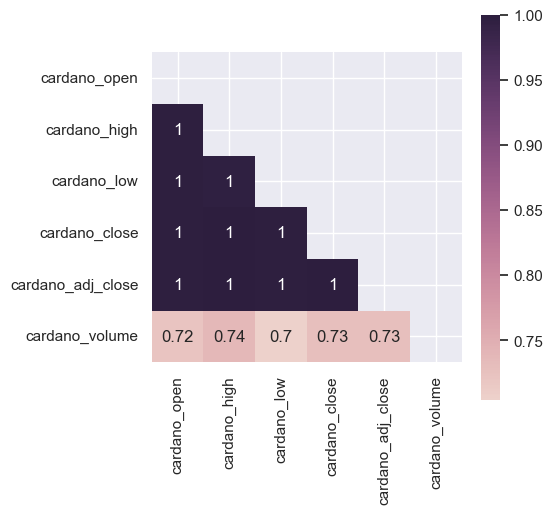

In [37]:
import numpy as np

plt.figure(figsize=(5,5))

corr=temp_df[temp_df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), mask=mask, square = True, annot = True)
plt.show()

Los gráficos anteriores sugieren una relación lineal entre los datos de los pares de variables graficados. Sin embargo, esta tendencia no es tan evidente en los pares que incluyen la variable  `Volumen`. Esta discrepancia podría atribuirse a las diferentes escalas utilizadas. Es necesario realizar un análisis más exhaustivo para comprender completamente esta situación.

In [38]:
cursor.close()
connection.close()
